                                     Rutik Rajeshkumar Kothwala
                                              Malav Shah
                                            Chandani Thumar 

  Project 2 - Build Machine Learning models to predict whether a customer will churn or not with huge emphasis to recall.

    Objective - 1- Build each of the four (4) models independently, by taking the default parameters. 
                2- Present the accuracy of each model; list the best model (in terms of ‘recall’ metric)
                3- Tune (Hyperparameter tuning) only the Random Forest and XGBoost Models 
                4- Present the accuracy of each model; list the best model (in terms of ‘recall’ metric)
                5- Which of the two stages of analysis produces better results? Which is the best model, overall?

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,auc,f1_score,plot_confusion_matrix,precision_score,recall_score
from sklearn.metrics import plot_precision_recall_curve
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# importing data

In [3]:
customer_data=pd.read_csv('telco-customer-churn.csv')
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# to get the index (row labels)
customer_data.index

RangeIndex(start=0, stop=7043, step=1)

In [7]:
# to get the column labels of the dataframe
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# to get the total number of elements from the dataframe.
customer_data.size

147903

In [9]:
# to get the dimensionality of the dataframe
customer_data.shape

(7043, 21)

In [10]:
customer_data.ndim

2

In [11]:
# Checking data types of each column.
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
# Count of unique data types
customer_data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [13]:
# Only 3 features are numeric - 'SeniorCitizen'(categorical),'Tenure'and 'MonthlyCharges'(continuous).
# Datatype of rest of the features is object.
# From the sample data it can be seen that most of the features are categorical, which we will map into numerical.

In [14]:
# selecting data based on data types
customer_data.select_dtypes(exclude=[object])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [15]:
# Concise summary of dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Checking format of each column
# By using info(), we can see
# TotalCharges has been read as object instead of numeric data.

In [17]:
customer_data=pd.read_csv('telco-customer-churn.csv',na_values=[' '])

In [18]:
# There are 11 null values in Totalcharges.
# Now we will replace null values in TotalCharges by mean value.

In [19]:
customer_data['TotalCharges'].fillna(customer_data['TotalCharges'].mean(),inplace = True)

In [20]:
# So now there is aboslutely NO missing data in our dataset.

In [21]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
# Here CustomerID represents ID of each customer Since this is Unique for all 7043 records we can ignore this feature so it can be drop.

In [23]:
customer_data=customer_data.drop(columns=(['customerID']))

In [24]:
# Dropping the duploicates value
customer_data=customer_data.drop_duplicates()

In [25]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [26]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.342338
std,0.368947,24.534965,30.069001,2265.044153
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
# There is not much diff in the mean value, max value and min value so no outliers are observes here.

Text(0, 0.5, 'TotalCahrges(USD)')

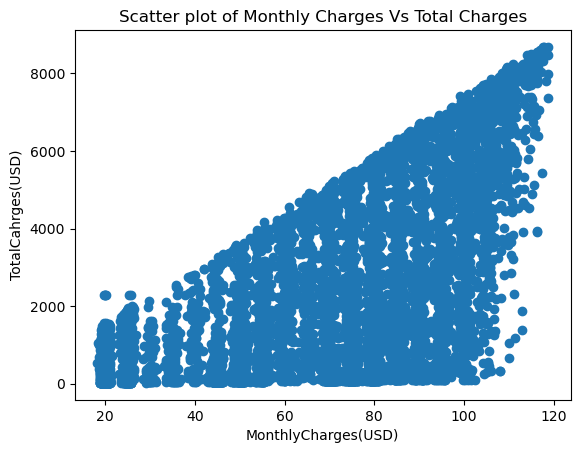

In [28]:
# Now we will plot the different graphs and analyze it.
plt.scatter(customer_data['MonthlyCharges'],customer_data['TotalCharges'])
plt.title('Scatter plot of Monthly Charges Vs Total Charges')
plt.xlabel('MonthlyCharges(USD)')
plt.ylabel('TotalCahrges(USD)')

In [29]:
# Total charges has positive correlation with Monthly Charges

Text(0, 0.5, 'Total Charges')

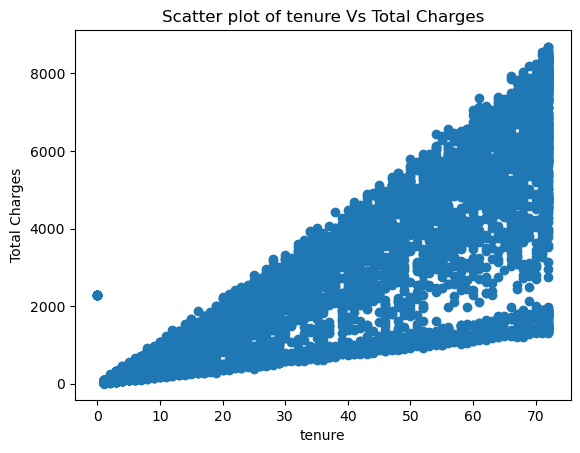

In [30]:
plt.scatter(customer_data['tenure'],customer_data['TotalCharges'])
plt.title('Scatter plot of tenure Vs Total Charges')
plt.xlabel('tenure')
plt.ylabel('Total Charges')

In [31]:
# This Scatter plot shows that there is a positive correlation between tenure and Total Charges.

Text(0, 0.5, 'MonthlyCharges (USD)')

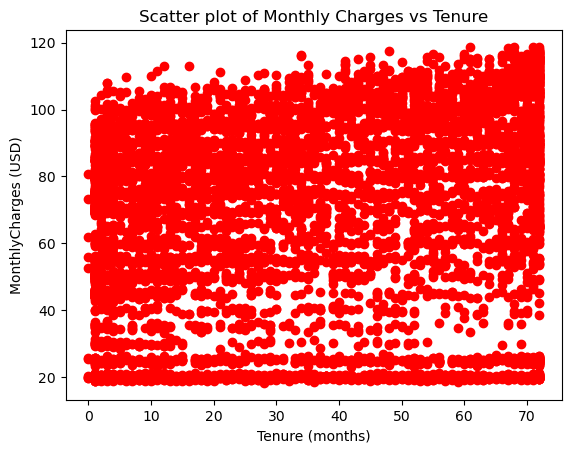

In [32]:
plt.scatter(customer_data['tenure'],customer_data['MonthlyCharges'],c='red')
plt.title('Scatter plot of Monthly Charges vs Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('MonthlyCharges (USD)')

Text(0, 0.5, 'Frequency')

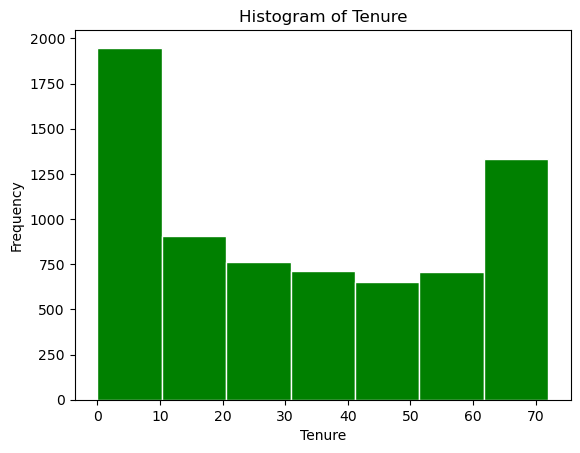

In [33]:
plt.hist(customer_data['tenure'], bins = 7,color='green',edgecolor = 'white')
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

In [34]:
# It can be seen that maximum no of customer i.e around 1900 stayed with the company for only 0-10 months.
# There are around 1500 people who stayed with the company for more than 60 months.


Text(0, 0.5, 'Frequency')

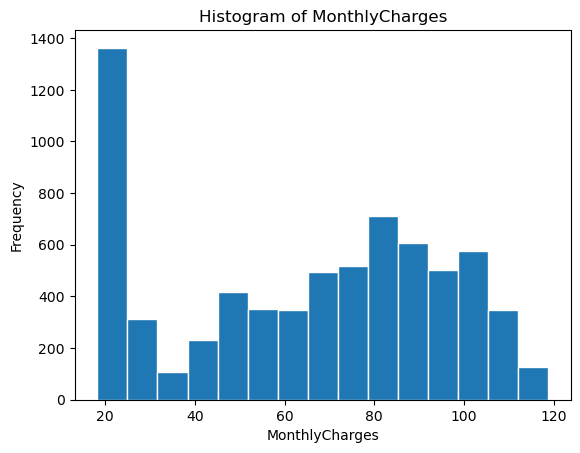

In [35]:
plt.hist(customer_data['MonthlyCharges'],bins = 15,edgecolor='white')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')

In [36]:
# Maximum no of people pays Monthly Charge of 20 USD.
# So most of the customers are interested in plan with minimum monthly charges.

Text(0, 0.5, 'Frequency')

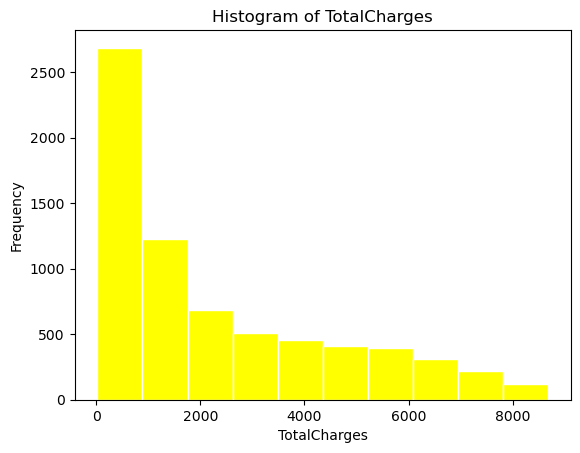

In [37]:
plt.hist(customer_data['TotalCharges'], color= 'yellow',edgecolor='white')
plt.title('Histogram of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')

In [38]:
# From above plot it can be observe that with the increase in total charges the number of customers decreases.
# So customers are more interested in cheaper plan.

<AxesSubplot:ylabel='tenure'>

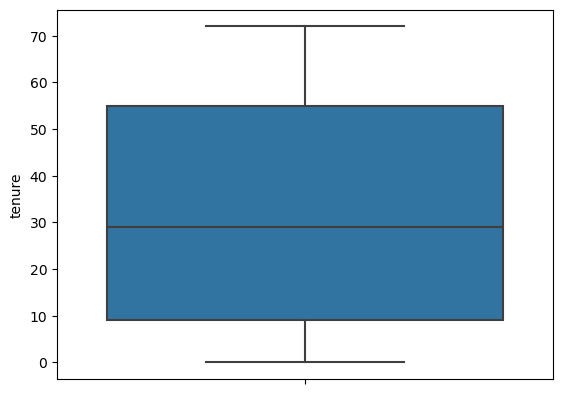

In [39]:
sns.boxplot (y=customer_data['tenure'])

In [40]:
# so in tenure  no outliers are observed 

<AxesSubplot:ylabel='MonthlyCharges'>

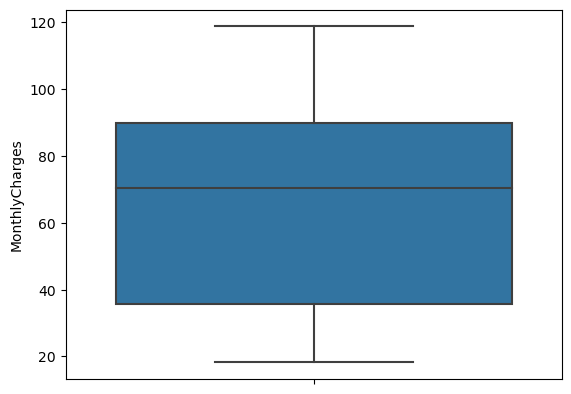

In [41]:
sns.boxplot (y=customer_data['MonthlyCharges'])

In [42]:
# here too no outliers are observed.

<AxesSubplot:ylabel='TotalCharges'>

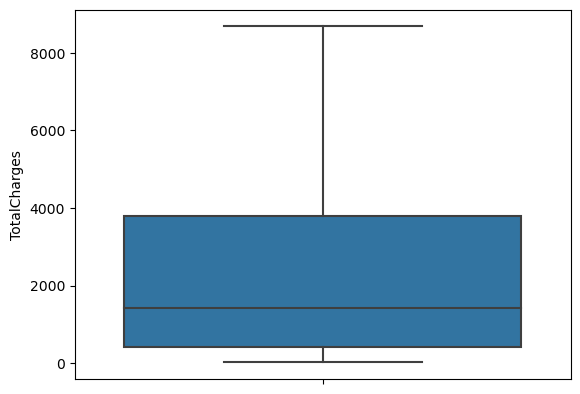

In [43]:
sns.boxplot (y=customer_data['TotalCharges'])

In [44]:
# No outliers are observed

In [45]:
# Getting the list names of all the features names in the dataset
columns = list(customer_data.columns)

In [46]:
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

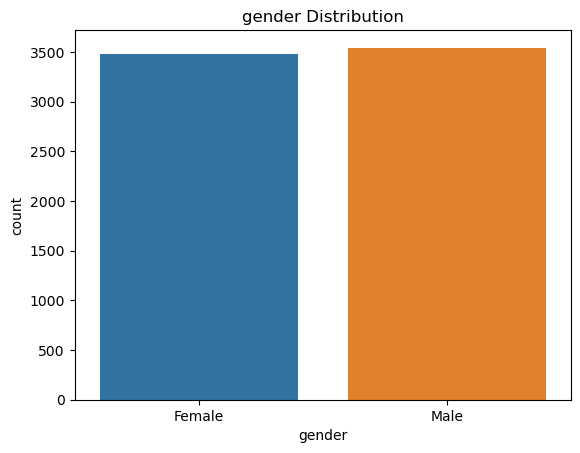

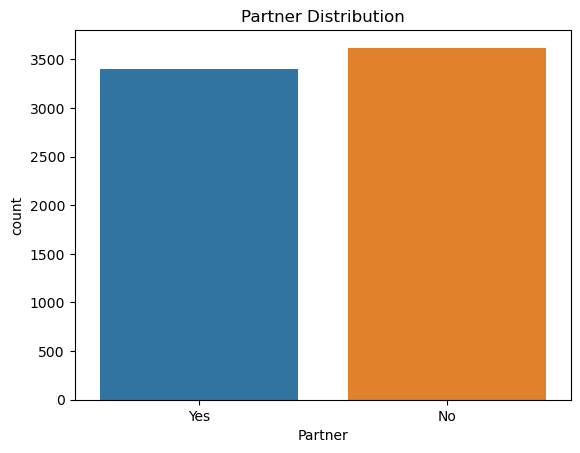

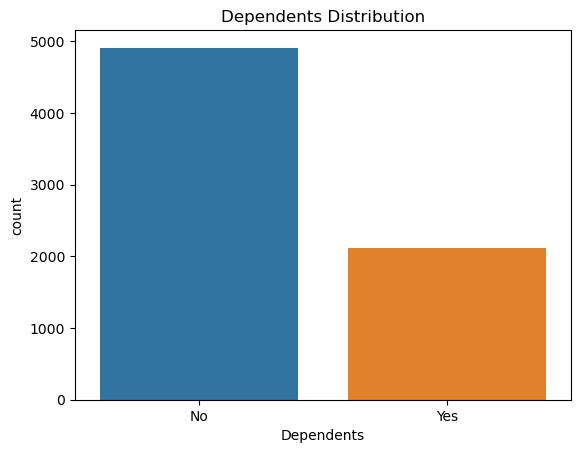

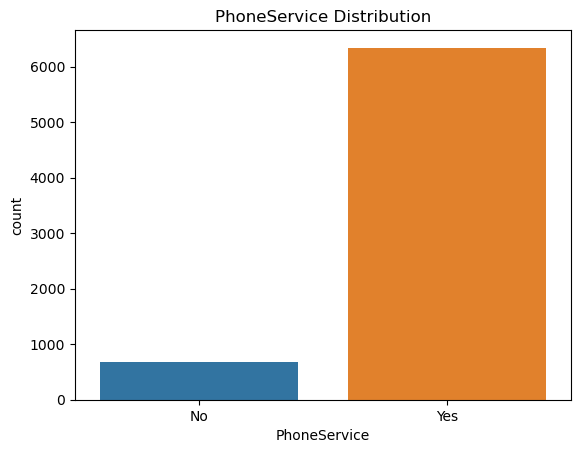

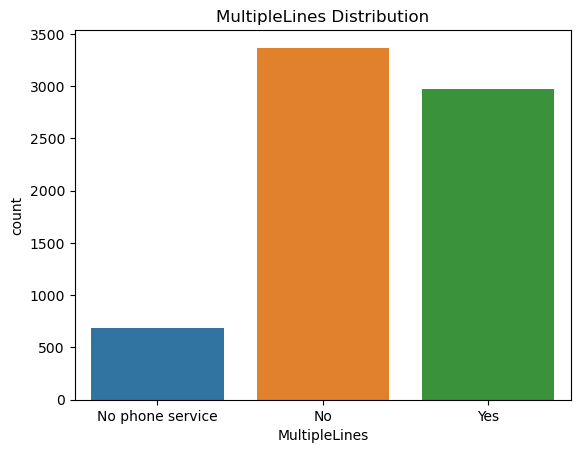

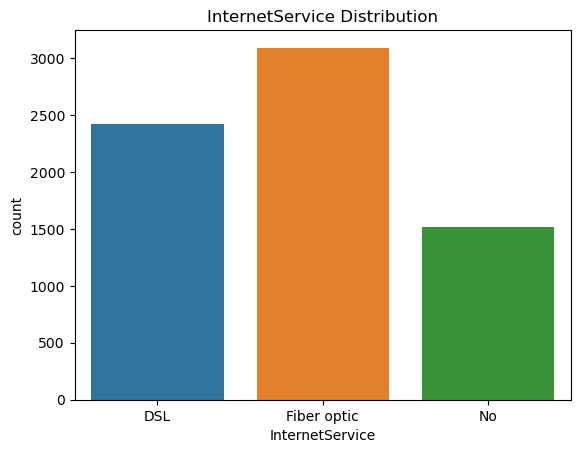

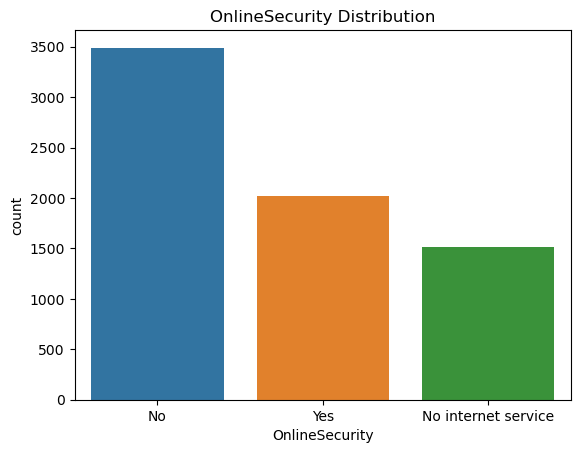

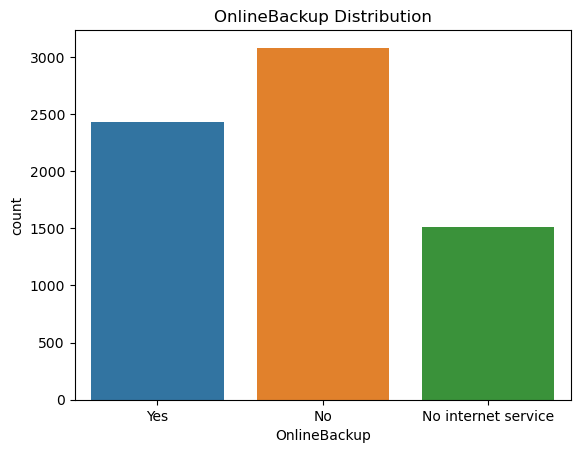

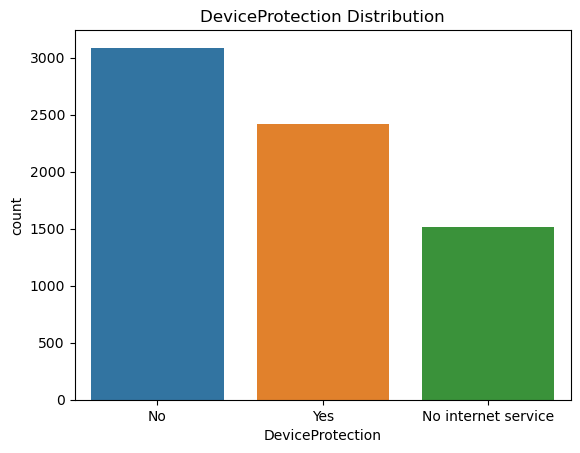

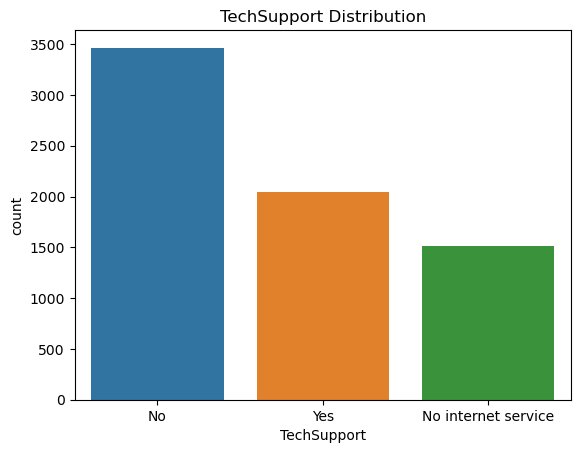

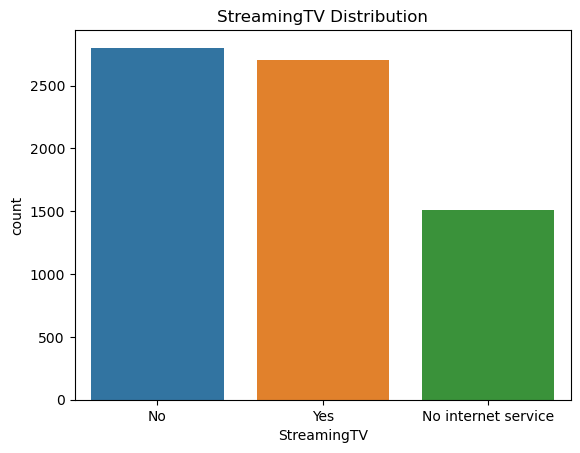

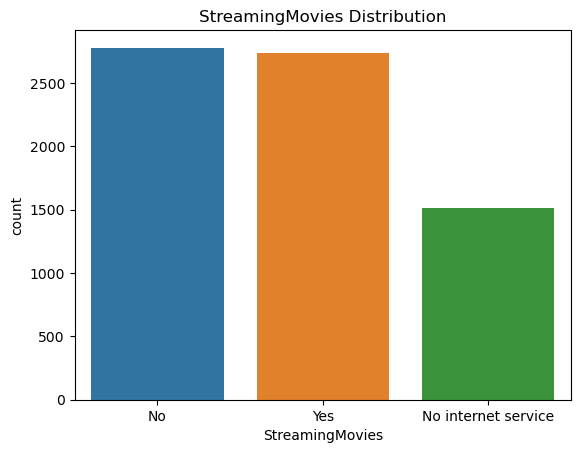

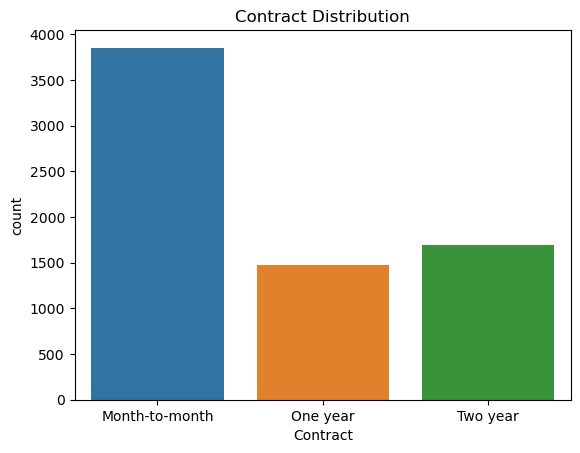

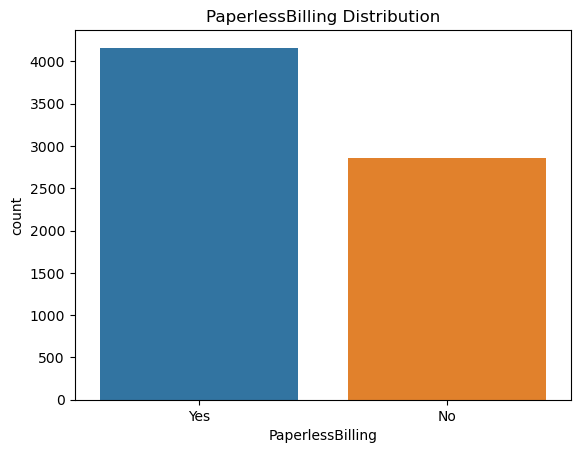

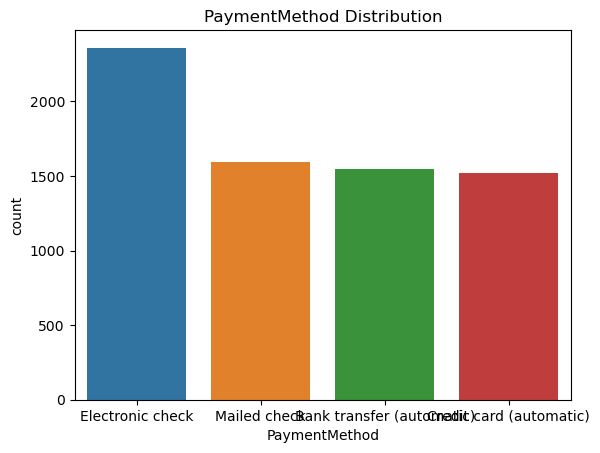

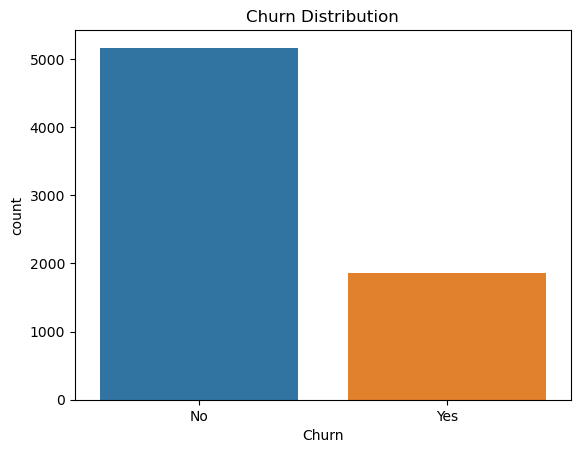

In [48]:
# Loop through each column in the DataFrame
for column in customer_data.columns:
    # If the column contains categorical data, draw a count plot using seaborn
    if customer_data[column].dtype == 'object':
        sns.countplot(x=column, data=customer_data)
        plt.title(f"{column} Distribution")
        plt.show()

# Encode Categorical Feature

In [49]:
customer_data['PhoneService'].replace({'Yes':1,'No':0},inplace=True)
customer_data['Dependents'].replace({'Yes':1,'No':0},inplace=True)
customer_data['Partner'].replace({'Yes':1,'No':0},inplace=True)
customer_data['PaperlessBilling'].replace({'Yes':1,'No':0},inplace=True)
customer_data['Churn'].replace({'Yes':1,'No':0},inplace=True)
customer_data['SeniorCitizen'].replace({'Yes':1,'No':0},inplace=True)

In [50]:
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Define the columns to encode
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [53]:
le = LabelEncoder()

# Loop through the columns and encode them
for col in cat_cols:
    customer_data[col] = le.fit_transform(customer_data[col])

In [54]:
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Feature selection

In [55]:
X= customer_data.drop('Churn',axis=1)
y= customer_data.Churn 

In [56]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

Contract            0.098769
tenure              0.075286
OnlineSecurity      0.071854
TechSupport         0.065803
InternetService     0.052735
MonthlyCharges      0.051165
DeviceProtection    0.046704
OnlineBackup        0.043625
StreamingMovies     0.042640
PaymentMethod       0.042612
TotalCharges        0.041642
PaperlessBilling    0.025539
StreamingTV         0.019408
Partner             0.014565
Dependents          0.009641
PhoneService        0.001734
MultipleLines       0.001589
SeniorCitizen       0.000472
gender              0.000000
Name: MI Scores, dtype: float64

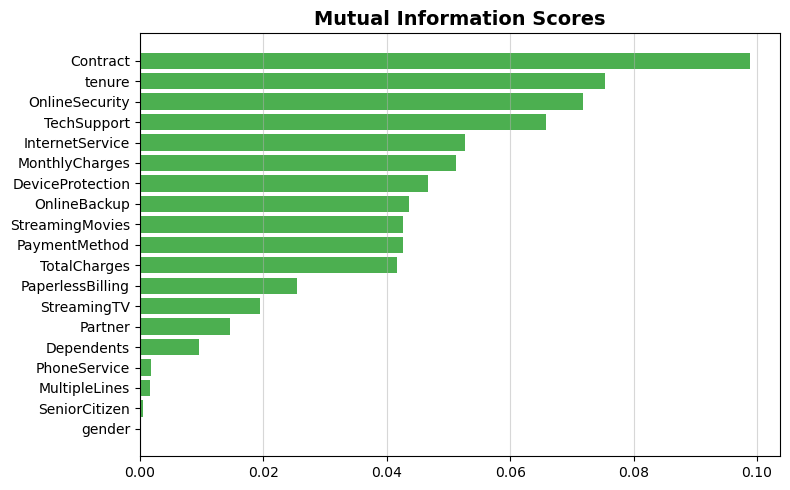

In [57]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
    ax.barh(width, scores, color='#4CAF50')
    ax.set_yticks(width)
    ax.set_yticklabels(ticks, fontsize=10)
    ax.set_title("Mutual Information Scores", fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plot_mi_scores(mi_scores)

In [58]:
# So As Shown above gender,PhoneService, and MultipleLines have a mutualinformation close to 0 
# Implies that those variables do not have a strong relationship with the target.
# So we can remove those variables.

<AxesSubplot:>

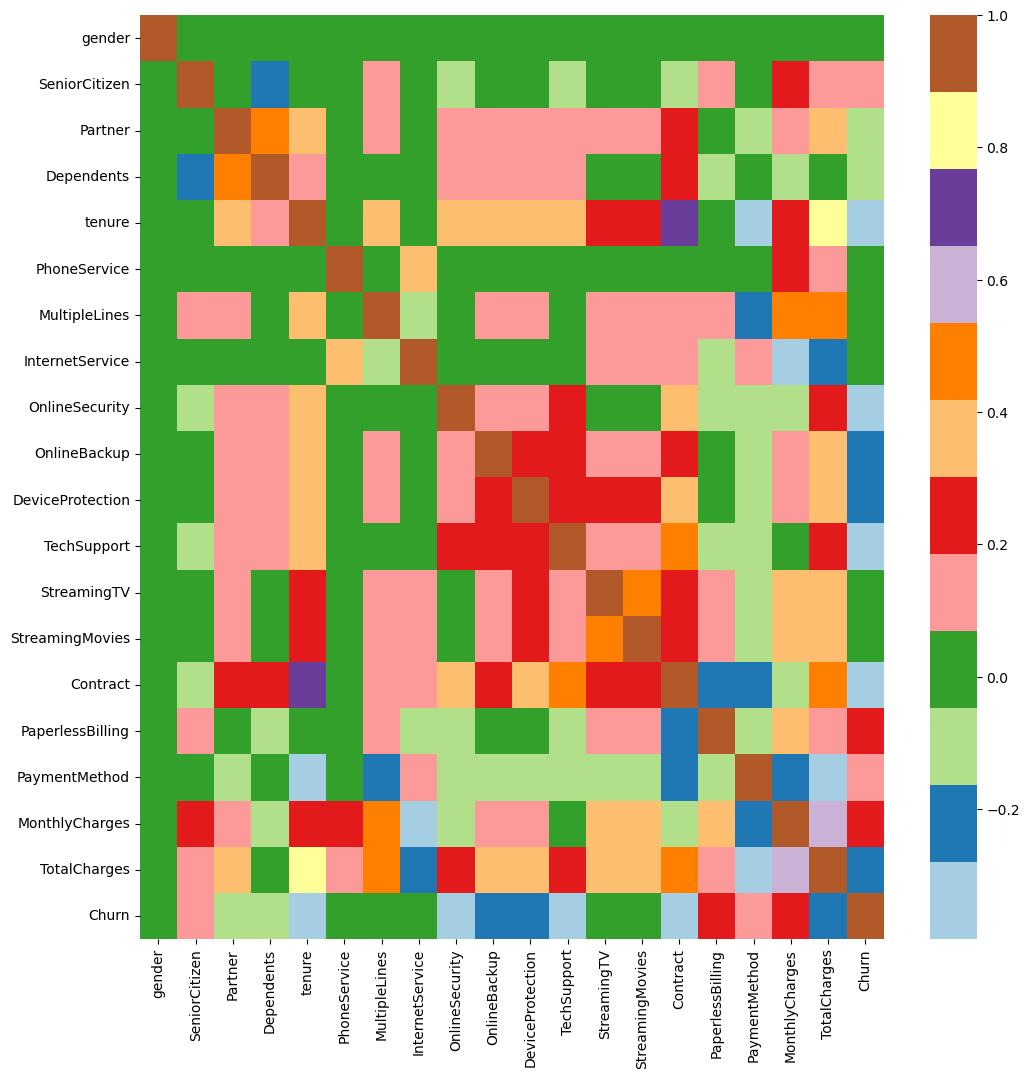

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(customer_data.corr(), cmap="Paired")

In [60]:
# Following Insight can be observed from above :-
# High Churn is seen in case of Month to month contracts,No online security,No Tech support,Fiber Optics Internet and Senior Citizen
# Low Churn is seen in case of Long term contracts, Subscriptions without internet service and the customers engaged for 4+ years.
# Factors like Gender , Availability of PhoneService and  multiple lines have almost NO impact on Churn.


In [61]:
# Most important variables affecting the target variables
# Tenure and Contracts seems to be Strong factors that affecting the target variable
# Improvement can be done in Month to Month Contract to decrease the churn rate, as high churn rate is seen 
# in month to month contract to decrease it  better monthly plan should be launched by the company.
# Also Company Should try to get customers for longer duration instead of only 
# focusing on monthly plans.And try to hold their old customer by giving them exciting offers as tenure increases churn rate decreases.

In [62]:
customer_data= customer_data.drop(columns=(['PhoneService']))
customer_data= customer_data.drop(columns=(['MultipleLines']))
customer_data=customer_data.drop(columns=(['gender']))

# Normalization

In [63]:
from sklearn import preprocessing

In [64]:
scaler = preprocessing.MinMaxScaler()
names = customer_data.columns
d = scaler.fit_transform(customer_data)
df_telco_transformed = pd.DataFrame(d, columns=names)
df_telco_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,0.013889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,0.0,0.0,0.0,0.472222,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,0.0,0.0,0.0,0.027778,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,0.0,0.0,0.0,0.625000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.027778,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0


In [65]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')
# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# Model Evaluation

In [66]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
                                                    

### Logistic Regression

In [67]:
logisticModel = LogisticRegression()
lr=logisticModel.fit(X_train,y_train)
print("Intercept: ",logisticModel.intercept_)
y_pred1_test= logisticModel.predict(X_test)
print(classification_report(y_test,y_pred1_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1_test)
print(confusion_matrix)
print("Recall score: ", recall_score(y_test, y_pred1_test))

Intercept:  [-0.72816077]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1040
         1.0       0.67      0.54      0.60       365

    accuracy                           0.81      1405
   macro avg       0.76      0.72      0.74      1405
weighted avg       0.80      0.81      0.81      1405

[[945  95]
 [168 197]]
Recall score:  0.5397260273972603


<AxesSubplot:>

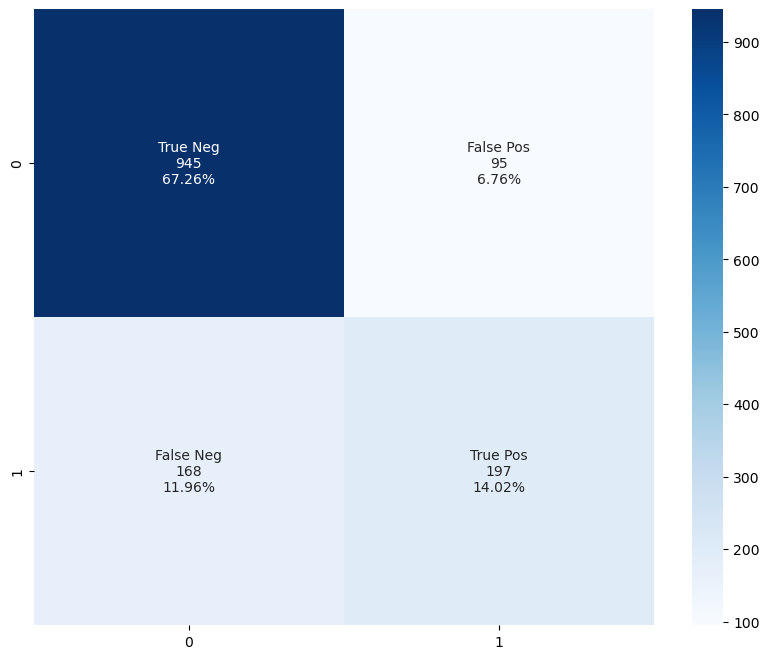

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [69]:
# So For logistic Regression model we get recall 0.55

In [70]:
# precision-recall curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


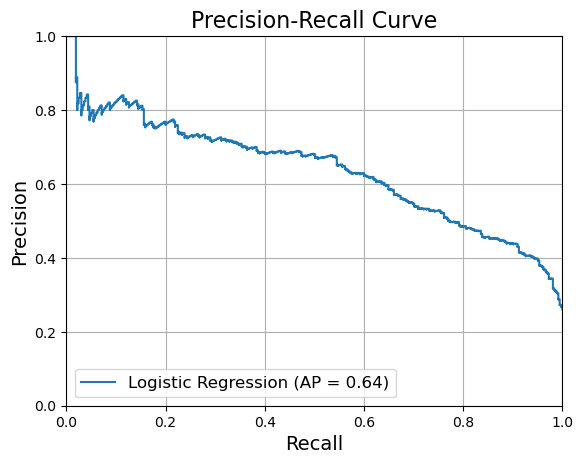

In [71]:
disp = plot_precision_recall_curve(lr, X_test, y_test, name='Logistic Regression')

# Set axis labels and title
disp.ax_.set_xlabel('Recall', fontsize=14)
disp.ax_.set_ylabel('Precision', fontsize=14)
disp.ax_.set_title('Precision-Recall Curve', fontsize=16)

# Set axis limits
disp.ax_.set_xlim([0.0, 1.0])
disp.ax_.set_ylim([0.0, 1.0])

# Add gridlines
disp.ax_.grid(True)

# Add legend
disp.ax_.legend(loc='lower left', fontsize=12)

# Display the plot
plt.show()

In [72]:
# ROC Curve

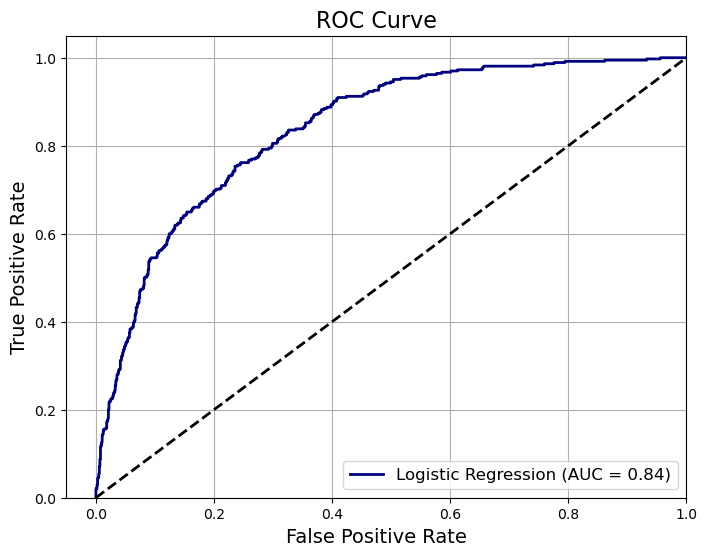

In [73]:
y_pred_proba = logisticModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc, color='navy', linewidth=2)

# set axis labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)

# add diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# set axis limits
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

# add gridlines and legend
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)

# display plot
plt.show()

### Randforest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred2_test=clf.predict(X_test)
print(classification_report(y_test,y_pred2_test))
print("Recall score: ", recall_score(y_test, y_pred2_test))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1040
         1.0       0.63      0.47      0.54       365

    accuracy                           0.79      1405
   macro avg       0.73      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405

Recall score:  0.473972602739726


In [76]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2_test)
print(confusion_matrix)

[[939 101]
 [192 173]]


<AxesSubplot:>

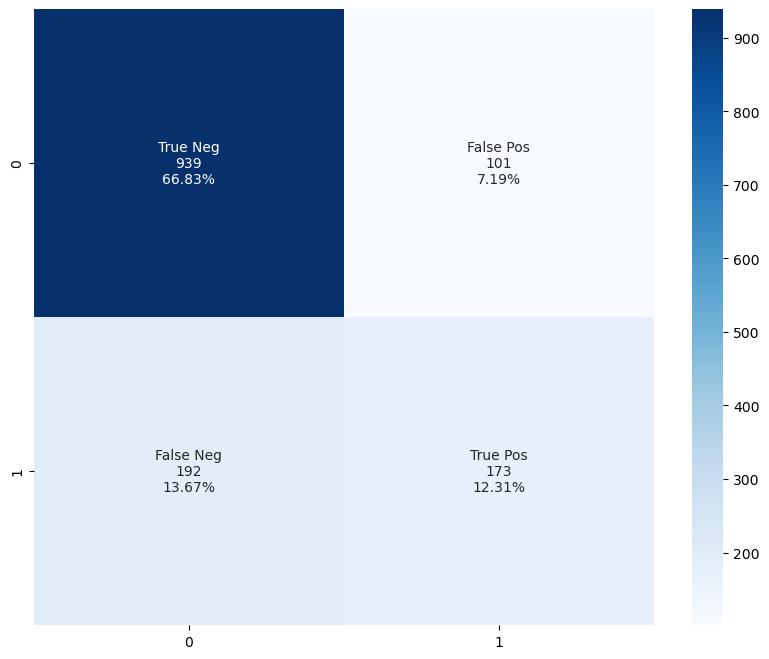

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [78]:
# So For RandomForest Classifier we get a recall score 46

In [79]:
# precision-recall curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


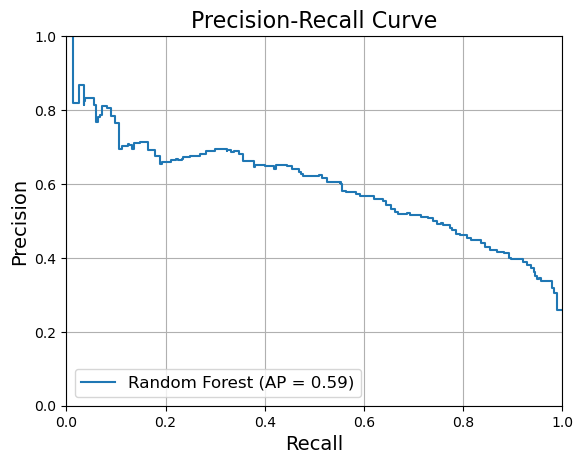

In [80]:
disp = plot_precision_recall_curve(clf, X_test, y_test, name = 'Random Forest')

# Set axis labels and title
disp.ax_.set_xlabel('Recall', fontsize=14)
disp.ax_.set_ylabel('Precision', fontsize=14)
disp.ax_.set_title('Precision-Recall Curve', fontsize=16)

# Set axis limits
disp.ax_.set_xlim([0.0, 1.0])
disp.ax_.set_ylim([0.0, 1.0])

# Add gridlines
disp.ax_.grid(True)

# Add legend
disp.ax_.legend(loc='lower left', fontsize=12)

# Display the plot
plt.show()

In [81]:
# ROC curve 

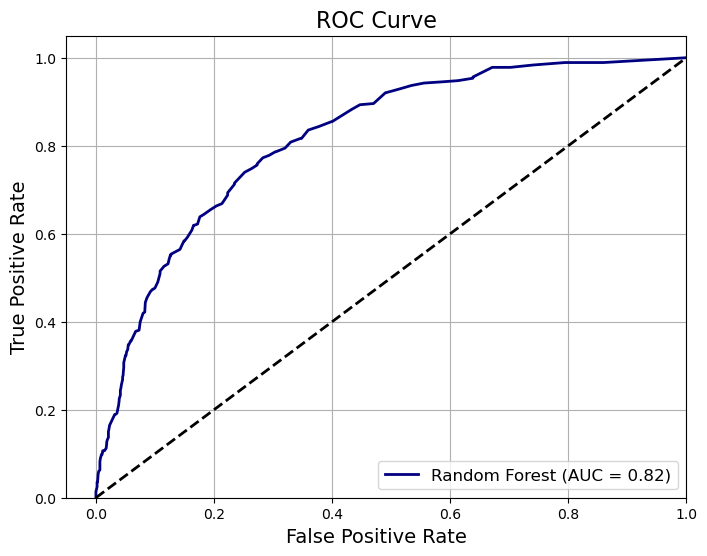

In [82]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc, color='navy', linewidth=2)

# set axis labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)

# add diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# set axis limits
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

# add gridlines and legend
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)

# display plot
plt.show()

### GaussianNB

In [83]:
from sklearn.naive_bayes import GaussianNB
model=  GaussianNB()
model

GaussianNB()

In [84]:
model.fit(X_train,y_train)

GaussianNB()

In [85]:
y_pred3_test=model.predict(X_test)
prediction3= model.predict(X_test)
print(classification_report(y_test,y_pred3_test))
print("Recall score: ", recall_score(y_test, y_pred3_test))

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1040
         1.0       0.52      0.73      0.61       365

    accuracy                           0.75      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.79      0.75      0.77      1405

Recall score:  0.7315068493150685


In [86]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred3_test)
print(confusion_matrix)

[[793 247]
 [ 98 267]]


<AxesSubplot:>

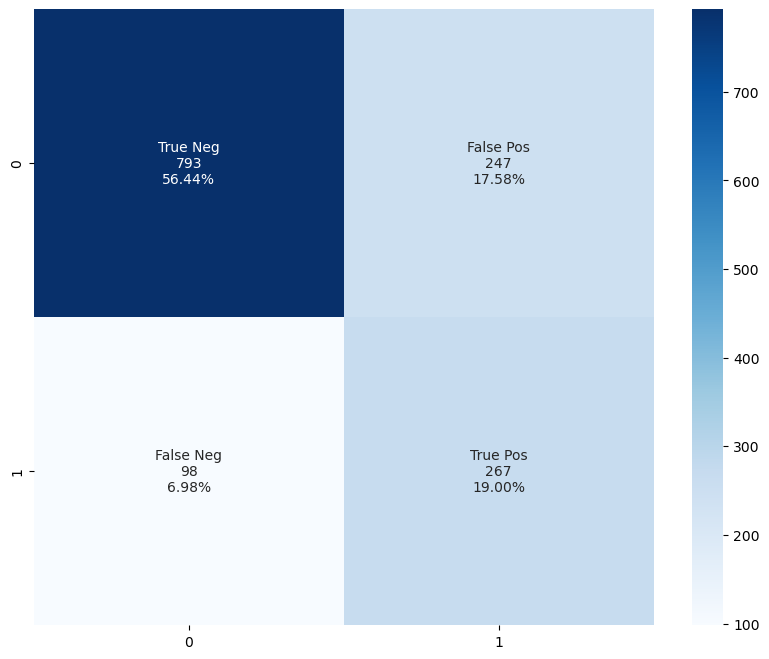

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

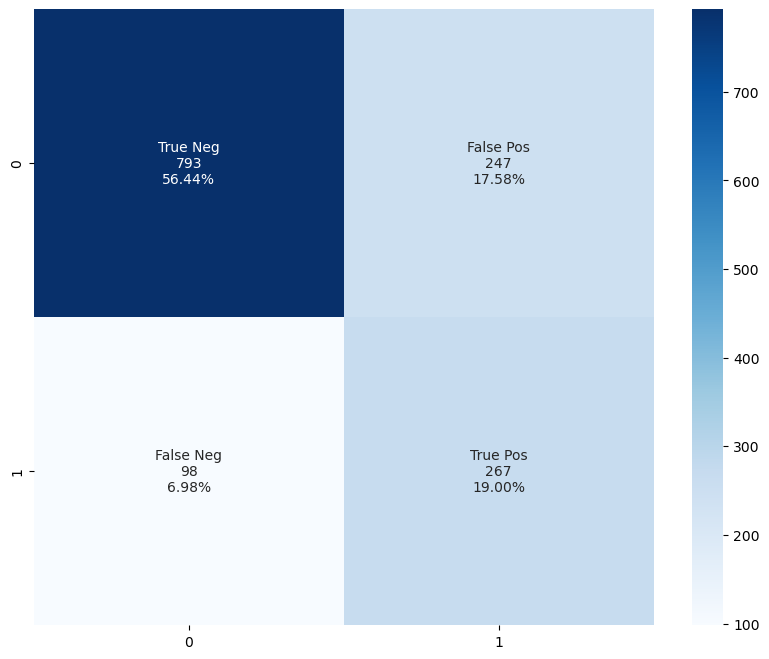

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [89]:
# precison recall curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


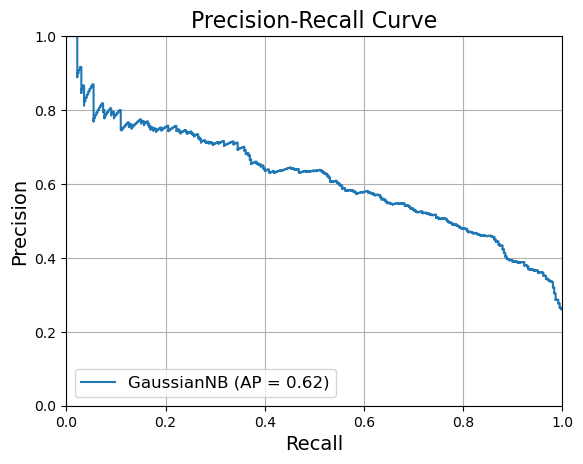

In [90]:
disp = plot_precision_recall_curve(model, X_test, y_test, name = 'GaussianNB')

# Set axis labels and title
disp.ax_.set_xlabel('Recall', fontsize=14)
disp.ax_.set_ylabel('Precision', fontsize=14)
disp.ax_.set_title('Precision-Recall Curve', fontsize=16)

# Set axis limits
disp.ax_.set_xlim([0.0, 1.0])
disp.ax_.set_ylim([0.0, 1.0])

# Add gridlines
disp.ax_.grid(True)

# Add legend
disp.ax_.legend(loc='lower left', fontsize=12)

# Display the plot
plt.show()

In [91]:
# ROC CURVE

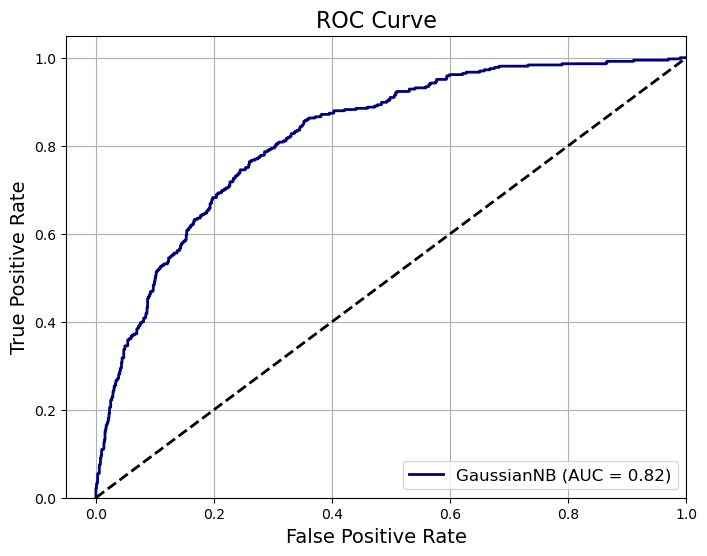

In [92]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='GaussianNB (AUC = %0.2f)' % auc, color='navy', linewidth=2)

# set axis labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)

# add diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# set axis limits
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

# add gridlines and legend
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)

# display plot
plt.show()

### XGBOOST

In [93]:
import xgboost as xgb
from xgboost import XGBClassifier
modelxg= XGBClassifier()
modelxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [94]:
y_pred4_test= modelxg.predict(X_test)
print(classification_report(y_test,y_pred4_test))
print("Recall score: ", recall_score(y_test, y_pred4_test))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1040
         1.0       0.63      0.49      0.55       365

    accuracy                           0.79      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405

Recall score:  0.4904109589041096


In [95]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4_test)
print(confusion_matrix)

[[936 104]
 [186 179]]


<AxesSubplot:>

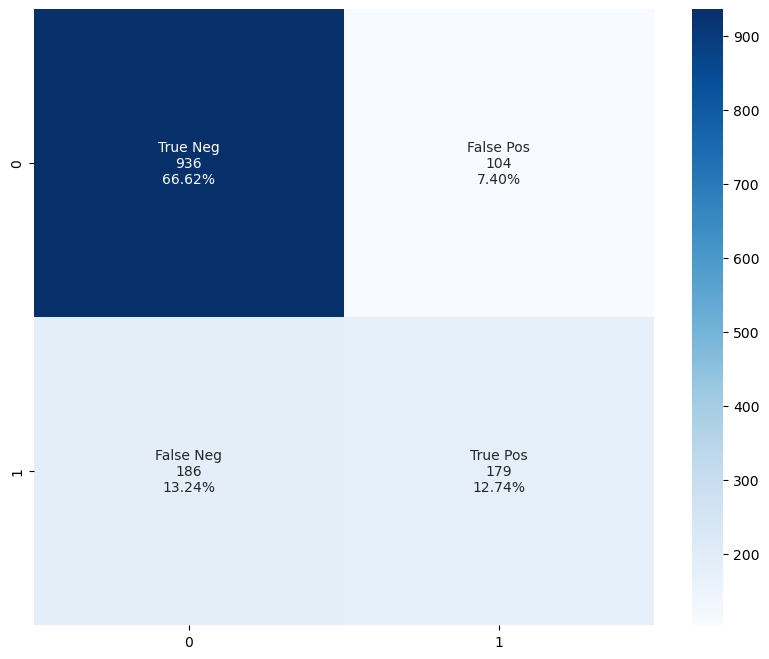

In [96]:
fig, ax = plt.subplots(figsize=(10, 8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


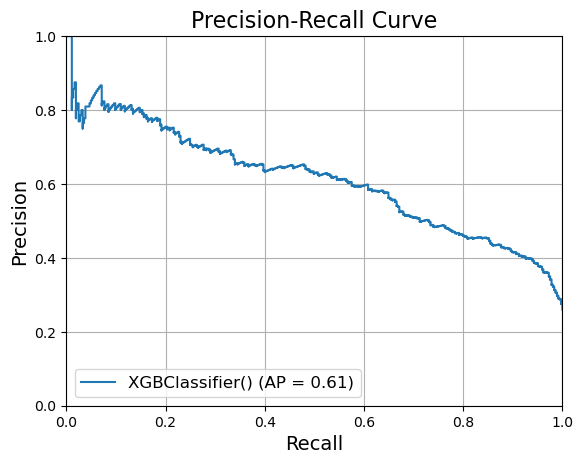

In [97]:
disp = plot_precision_recall_curve(modelxg, X_test, y_test, name = 'XGBClassifier()')

# Set axis labels and title
disp.ax_.set_xlabel('Recall', fontsize=14)
disp.ax_.set_ylabel('Precision', fontsize=14)
disp.ax_.set_title('Precision-Recall Curve', fontsize=16)

# Set axis limits
disp.ax_.set_xlim([0.0, 1.0])
disp.ax_.set_ylim([0.0, 1.0])

# Add gridlines
disp.ax_.grid(True)

# Add legend
disp.ax_.legend(loc='lower left', fontsize=12)

# Display the plot
plt.show()

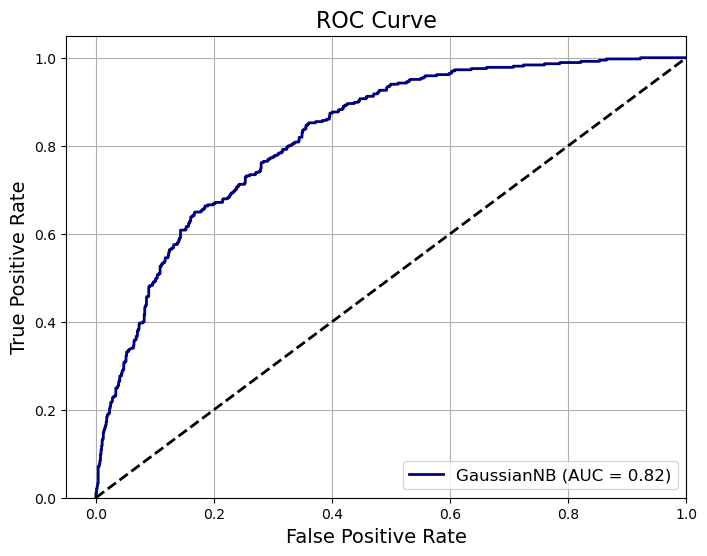

In [98]:
#define metrics
y_pred_proba = modelxg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='GaussianNB (AUC = %0.2f)' % auc, color='navy', linewidth=2)

# set axis labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)

# add diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# set axis limits
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

# add gridlines and legend
plt.grid(True)
plt.legend(loc='lower right', fontsize=12)

# display plot
plt.show()


# Hyperperameter tunning

### Random Forest Classifier

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [100]:
# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [101]:
# define the model
rfc = RandomForestClassifier()

In [102]:
# perform grid search cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [103]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 200}


In [104]:
# predict on the test set using the best model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

In [105]:
print(classification_report(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1040
         1.0       0.65      0.46      0.54       365

    accuracy                           0.80      1405
   macro avg       0.74      0.69      0.70      1405
weighted avg       0.78      0.80      0.78      1405

Recall score:  0.4575342465753425


### XGBOOST

In [106]:
# Split data into training and testing sets


# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

# Create randomized search object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the randomized search object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", random_search.best_params_)


# Use the best hyperparameters to create a final XGBoost model
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=random_search.best_params_['learning_rate'],
    max_depth=random_search.best_params_['max_depth'],
    n_estimators=random_search.best_params_['n_estimators'],
    min_child_weight=random_search.best_params_['min_child_weight'],
    gamma=random_search.best_params_['gamma'],
    subsample=random_search.best_params_['subsample'],
    colsample_bytree=random_search.best_params_['colsample_bytree']
)

# Fit the final model to the training data
final_model.fit(X_train, y_train)

# Predict the target variable for the test data using the final model
y_pred = final_model.predict(X_test)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1}


In [107]:
print(classification_report(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1040
         1.0       0.67      0.50      0.57       365

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405

Recall score:  0.4958904109589041


# Now oversample the data using SMOTE

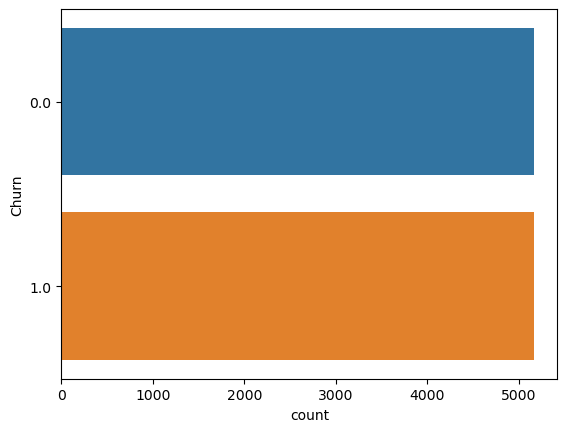

In [108]:
X_resampled,y_resampled = SMOTE().fit_resample(X,y)
X_resampled.shape
X_resampled.shape,y_resampled.shape
sns.countplot(y=y_resampled)
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=0)

### LogisticRegression

In [109]:
logisticModel.fit(X_train,y_train)

prediction1= logisticModel.predict(X_test)
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       965
         1.0       0.76      0.80      0.78      1101

    accuracy                           0.76      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.76      0.75      2066



In [110]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, prediction1)
print(confusion_matrix)
print("Recall score: ", recall_score(y_test, prediction1))

[[683 282]
 [224 877]]
Recall score:  0.7965485921889192


### RandomForest

In [111]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
prediction2= clf.predict(X_test)
print(classification_report(y_test,prediction2))
print("Recall score: ", recall_score(y_test, prediction2))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       965
         1.0       0.84      0.86      0.85      1101

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

Recall score:  0.8628519527702089


### GaussianNB

In [113]:
model=  GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [114]:
prediction3= model.predict(X_test)

print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72       965
         1.0       0.75      0.79      0.77      1101

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



In [115]:
print("Recall score: ", recall_score(y_test, prediction3))

Recall score:  0.7901907356948229


### XGBOOST

In [116]:
modelxg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [117]:
prediction4= modelxg.predict(X_test)
print(classification_report(y_test,prediction4))
print("Recall score: ", recall_score(y_test, prediction4))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       965
         1.0       0.85      0.85      0.85      1101

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

Recall score:  0.849227974568574


# Hypertunning after applying SMOTE

### Random_Forest

In [118]:
# define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [119]:
# define the model
rfc = RandomForestClassifier()

In [120]:
# perform grid search cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [121]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [122]:
# predict on the test set using the best model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

In [123]:
print(classification_report(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       965
         1.0       0.84      0.88      0.86      1101

    accuracy                           0.85      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.85      0.84      2066

Recall score:  0.8755676657584015


### XGBOOST

In [124]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [125]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)

In [126]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [127]:
random_search.fit(X_train,y_train)

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe8b8123890>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [128]:
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 1, 'colsample_bytree': 1.0}


In [129]:
y_pred = random_search.predict(X_test)

In [130]:
print(classification_report(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       965
         1.0       0.84      0.87      0.85      1101

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066

Recall score:  0.8692098092643051


In [131]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [132]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)

In [133]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

In [134]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[20:18:17] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe8b8120200>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='recall', verbose=3)

In [135]:
print(random_search.best_score_)

0.8597041066422481


In [136]:
# predict on the test set using the best model
best_rfc = random_search.best_estimator_
y_pred = best_rfc.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred))
print("Recall score: ", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       965
         1.0       0.82      0.87      0.84      1101

    accuracy                           0.83      2066
   macro avg       0.83      0.82      0.83      2066
weighted avg       0.83      0.83      0.83      2066

Recall score:  0.8710263396911898


# Conclusion

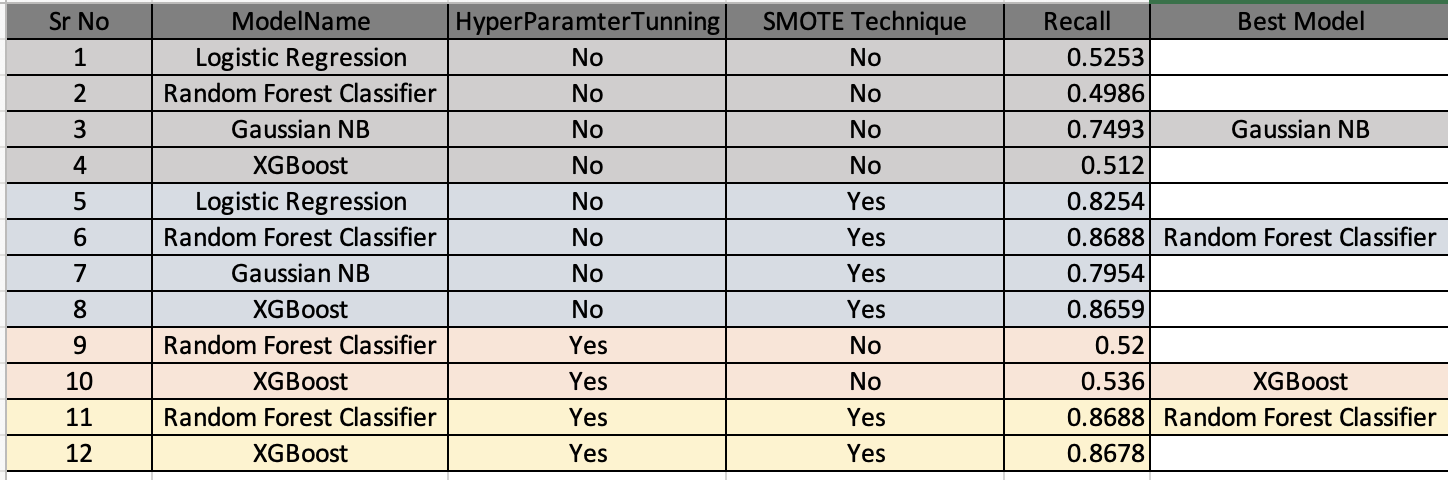